<a href="https://colab.research.google.com/github/FREDY129053/AI_Systems_LABS/blob/main/Lab_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа "Первичный анализ наборов данных"

## Получение данных

In [4]:
!wget http://archive.ics.uci.edu/static/public/262/turkiye+student+evaluation.zip
!pip install patool

--2025-10-03 14:26:45--  http://archive.ics.uci.edu/static/public/262/turkiye+student+evaluation.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘turkiye+student+evaluation.zip’

turkiye+student+eva     [  <=>               ] 804.59K  2.60MB/s    in 0.3s    

2025-10-03 14:26:45 (2.60 MB/s) - ‘turkiye+student+evaluation.zip’ saved [823901]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.5/86.5 kB 2.8 MB/s eta 0:00:00


In [5]:
import patoolib

patoolib.extract_archive('/content/turkiye+student+evaluation.zip')

INFO patool: Extracting /content/turkiye+student+evaluation.zip ...
INFO:patool:Extracting /content/turkiye+student+evaluation.zip ...
INFO patool: running /usr/bin/7z x -aou -o/content/Unpack_pzg1ea3d -- /content/turkiye+student+evaluation.zip
INFO:patool:running /usr/bin/7z x -aou -o/content/Unpack_pzg1ea3d -- /content/turkiye+student+evaluation.zip
INFO patool: ... /content/turkiye+student+evaluation.zip extracted to `turkiye+student+evaluation' (multiple files in root).
INFO:patool:... /content/turkiye+student+evaluation.zip extracted to `turkiye+student+evaluation' (multiple files in root).


'turkiye+student+evaluation'

In [9]:
CONTENT_DIR = "turkiye+student+evaluation"
FILE = CONTENT_DIR + "/turkiye-student-evaluation_generic.csv"

## Практические задания

In [7]:
import pandas as pd
import numpy as np

In [10]:
main_df = pd.read_csv(FILE)

### 1. Предложить методы анализа выбросов, учитывая особенности данных. Сделать анализ выбросов, удалить выбросы

#### Проверка гипотез

Проверка гипотез – это метод проверки утверждения или гипотезы о параметре в совокупности с использованием данных, измеренных в выборке. В этом методе мы проверяем гипотезу, определяя вероятность того, что статистическая величина выборки могла бы быть выбрана, если бы гипотеза относительно параметра общей совокупности была бы верной.

Цель проверки гипотезы – определить вероятность того, что параметр совокупности, такой как среднее значение, вероятно, будет истинным.
https://datafinder.ru/products/obnaruzhenie-vybrosov-s-pomoshchyu-python

In [20]:
import scipy.stats as stats

def check_ano(t):
  n = len(t)
  mean_t = np.array(t.mean())
  sd_t = np.array(t.std())
  numerator = max(abs(np.array(t)-mean_t))
  g_calc = numerator/sd_t
  t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
  g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
  print("-----------------------------------------")
  print(f"Вычесленное значение: {g_calc}")
  print(f"Критическое значение: {g_critical}")
  if g_critical > g_calc:
    print(f"{t.name} - Выбросов нет")
  else:
    print(f"{t.name} - Выбросы есть")
  print("-----------------------------------------\n")

main_df.apply(check_ano, axis=0)

----------------------------------------
Вычесленное значение: 2.067672791876516
Критическое значение: 4.446306181227739
instr - Выбросов нет
-----------------------------------------

----------------------------------------
Вычесленное значение: 1.701732924296256
Критическое значение: 4.446306181227739
class - Выбросов нет
-----------------------------------------

----------------------------------------
Вычесленное значение: 3.3546047791571114
Критическое значение: 4.446306181227739
nb.repeat - Выбросов нет
-----------------------------------------

----------------------------------------
Вычесленное значение: 1.5758900188233418
Критическое значение: 4.446306181227739
attendance - Выбросов нет
-----------------------------------------

----------------------------------------
Вычесленное значение: 1.6430810637707849
Критическое значение: 4.446306181227739
difficulty - Выбросов нет
-----------------------------------------

----------------------------------------
Вычесленное значе

,0
instr,None
class,None
nb.repeat,None
attendance,None
difficulty,None
Q1,None
Q2,None
Q3,None
Q4,None
Q5,None


#### Isolation Forest

Обычные алгоритмы машинного обучения, например, SVM или нейросети, пытаются описать нормальное распределение данных, а затем искать выбросы. Isolation Forest идёт с другого конца: он не строит плотностную модель, а просто пытается изолировать выбросы.

Как это происходит:

- Строим дерево, где каждый узел случайно выбирает один признак и случайное значение разбиения.

- Рекурсивно делим данные, пока каждая точка не окажется в своём отдельном листе.

- Считаем аномальность точки по тому, насколько быстро она была изолирована (чем короче путь, тем аномальнее).

https://habr.com/ru/companies/otus/articles/881086/

In [21]:
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [39]:
model = IsolationForest(n_estimators=1000, max_samples=1000, random_state=42)
df_copy = main_df.copy()

df_copy["is_anomaly"] = model.fit_predict(df_copy[:])

In [40]:
df_copy['is_anomaly'] = df_copy['is_anomaly'].map({1: 0, -1: 1})

In [41]:
anomalies = df_copy[df_copy['is_anomaly'] == 1]
display(anomalies)

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,is_anomaly
14,1,2,1,2,3,1,1,1,1,1,...,3,3,3,2,2,1,1,1,1,1
15,1,2,1,3,4,5,5,4,4,5,...,4,4,5,5,4,4,4,5,4,1
22,1,2,1,3,3,3,3,3,3,3,...,2,1,1,1,3,2,2,2,2,1
23,1,2,1,2,4,5,3,3,3,2,...,2,4,4,5,5,4,4,5,5,1
26,1,2,1,1,2,1,1,1,1,5,...,5,5,5,5,5,5,5,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5775,3,13,3,4,2,1,2,3,2,2,...,5,5,5,5,5,5,5,5,4,1
5776,3,13,1,1,2,5,1,5,5,4,...,5,5,4,5,5,5,5,4,5,1
5782,3,13,1,0,5,2,1,2,1,2,...,2,2,2,2,1,2,2,1,2,1
5803,3,13,1,3,5,2,2,2,1,1,...,1,1,1,1,1,1,1,1,1,1


#### Local Outlier Factor

Как работает LOF:
- Оценка локальной плотности: LOF вычисляет локальную плотность вокруг каждой точки данных, сравнивая плотность соседних точек. Для этого используется конкретная точка и определенное окружение вокруг нее.
- Сравнение плотностей: алгоритм вычисляет коэффициент локального выброса, сравнивая плотность интересующей точки с плотностями ее соседей. Если плотность точки намного ниже, чем у соседних, то, скорее всего, это выброс.
- Оценка и пороговое значение: LOF присваивает оценку каждой точке данных, указывая степень ее “отклонения”. Эта оценка может быть установлена как пороговая, чтобы классифицировать точки как нормальные или аномальные.

https://medium.com/@ilyurek/anomaly-detection-with-local-outlier-factor-lof-b1b82227c15e

In [42]:
from sklearn.neighbors import LocalOutlierFactor

In [43]:
lof_model = LocalOutlierFactor(n_neighbors=30)

df_copy_lof = main_df.copy()

df_copy_lof["is_anomaly"] = model.fit_predict(df_copy_lof[:])

In [49]:
df_copy_lof['is_anomaly'] = df_copy_lof['is_anomaly'].map({1: 0, -1: 1})

In [51]:
anomalies_lof = df_copy_lof[df_copy_lof['is_anomaly'] == 1]
display(anomalies_lof)

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,is_anomaly
14,1,2,1,2,3,1,1,1,1,1,...,3,3,3,2,2,1,1,1,1,1
15,1,2,1,3,4,5,5,4,4,5,...,4,4,5,5,4,4,4,5,4,1
22,1,2,1,3,3,3,3,3,3,3,...,2,1,1,1,3,2,2,2,2,1
23,1,2,1,2,4,5,3,3,3,2,...,2,4,4,5,5,4,4,5,5,1
26,1,2,1,1,2,1,1,1,1,5,...,5,5,5,5,5,5,5,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5775,3,13,3,4,2,1,2,3,2,2,...,5,5,5,5,5,5,5,5,4,1
5776,3,13,1,1,2,5,1,5,5,4,...,5,5,4,5,5,5,5,4,5,1
5782,3,13,1,0,5,2,1,2,1,2,...,2,2,2,2,1,2,2,1,2,1
5803,3,13,1,3,5,2,2,2,1,1,...,1,1,1,1,1,1,1,1,1,1


In [54]:
print(anomalies.equals(anomalies_lof))

True


Isolation Forest подкрученный и Local Outliner Factor нашли те же выбросы, скорее всего они и являются выбросами)

In [59]:
main_df_copy = main_df.copy()
main_df_copy = main_df_copy.drop(anomalies_lof.index)
print(f"Размер исходного датасета: {main_df.shape}")
print(f"Размер датасета после удаления выбросов: {main_df_copy.shape}")

Размер исходного датасета: (5820, 33)
Размер датасета после удаления выбросов: (4620, 33)


### 2. Проанализировать матрицу корреляций оценок по различным критериям качества преподавания. Выявить значимые корреляции. Объяснить высокие и низкие корреляции

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
correlation_matrix = main_df.corr()

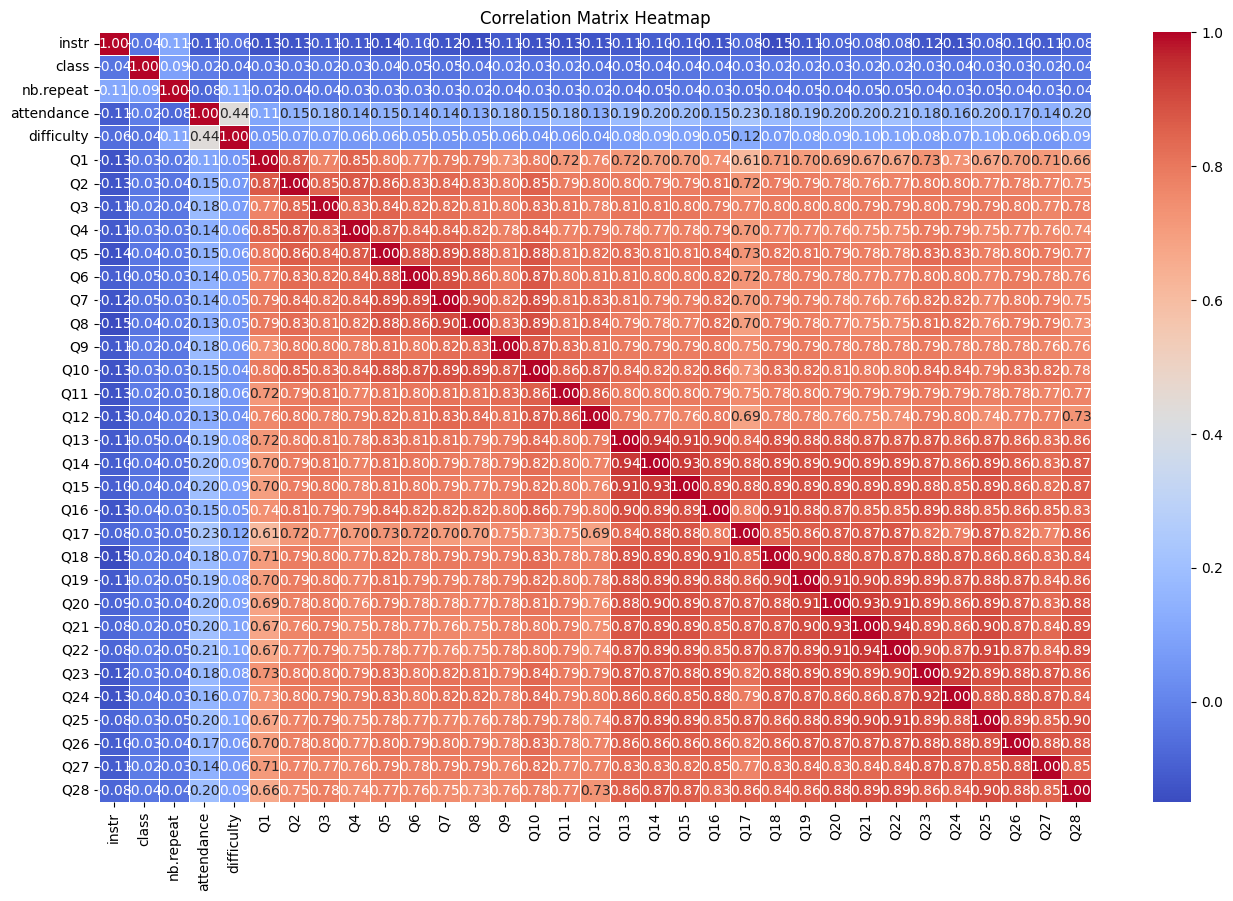

In [65]:
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Как видно по карте(и сказано было в примере) **вопросы** заметно коррелируют между собой, что можно объяснить их логическим порядком.

Видно, что **сложность** и **вопросы** коррелируют с посещаимостью.

### 3. Сравнить матрицы корреляций для разных предметов